In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
reward_log = pd.read_csv("test_sbl_resnet/reward_log.csv", index_col='timesteps')
reward_log.astype({'reward': 'float32', 'best_reward': 'float32'})
best_epoch = reward_log['reward'].idxmax()
print(best_epoch)

4050000


In [ ]:
df = pd.read_csv("best_model_ppo/win_rates.csv")
try:
    df = df.drop("Unnamed: 0", axis=1)
except KeyError:
    pass

try:
    df = df.drop("Unnamed: 0.1", axis=1)
except KeyError:
    pass

try:
    df = df.drop("Unnamed: 0.2", axis=1)
except KeyError:
    pass
df.head()

,Unnamed: 0.2,Levels,level_1-1_win_rates,level_1-1_mean_reward,world1_v1_win_rates,world1_v1_mean_reward,world1_v2_win_rates,world1_v2_mean_reward,level_1-1_resnet_win_rates,level_1-1_resnet_mean_reward,world1_resnet_win_rates,world1_resnet_mean_reward
0,0,1-1,0.68,854.232985,0.01,374.134993,0.11,643.922987,0.4,775.320986,0.0,264.185995
1,1,1-2,0.00,53.059999,0.00,279.587994,0.02,539.886989,0.0,127.034998,0.0,235.125996
2,2,1-3,0.00,146.256997,0.00,204.649996,0.00,211.677996,0.0,118.479998,0.0,158.258997
3,3,1-4,0.00,101.945999,0.04,405.036992,0.24,570.870989,0.0,114.157998,0.0,190.807997
4,4,2-1,0.00,182.270997,0.00,143.622998,0.00,138.230998,0.0,157.796997,0.0,121.672998


/home/ensta/ensta-leguery/.conda/envs/rl_project/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/ensta/ensta-leguery/.conda/envs/rl_project/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/ensta/ensta-leguery/.conda/envs/rl_project/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/ensta/ensta-leguery/.conda/envs/rl_project/lib/python3.8/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a g

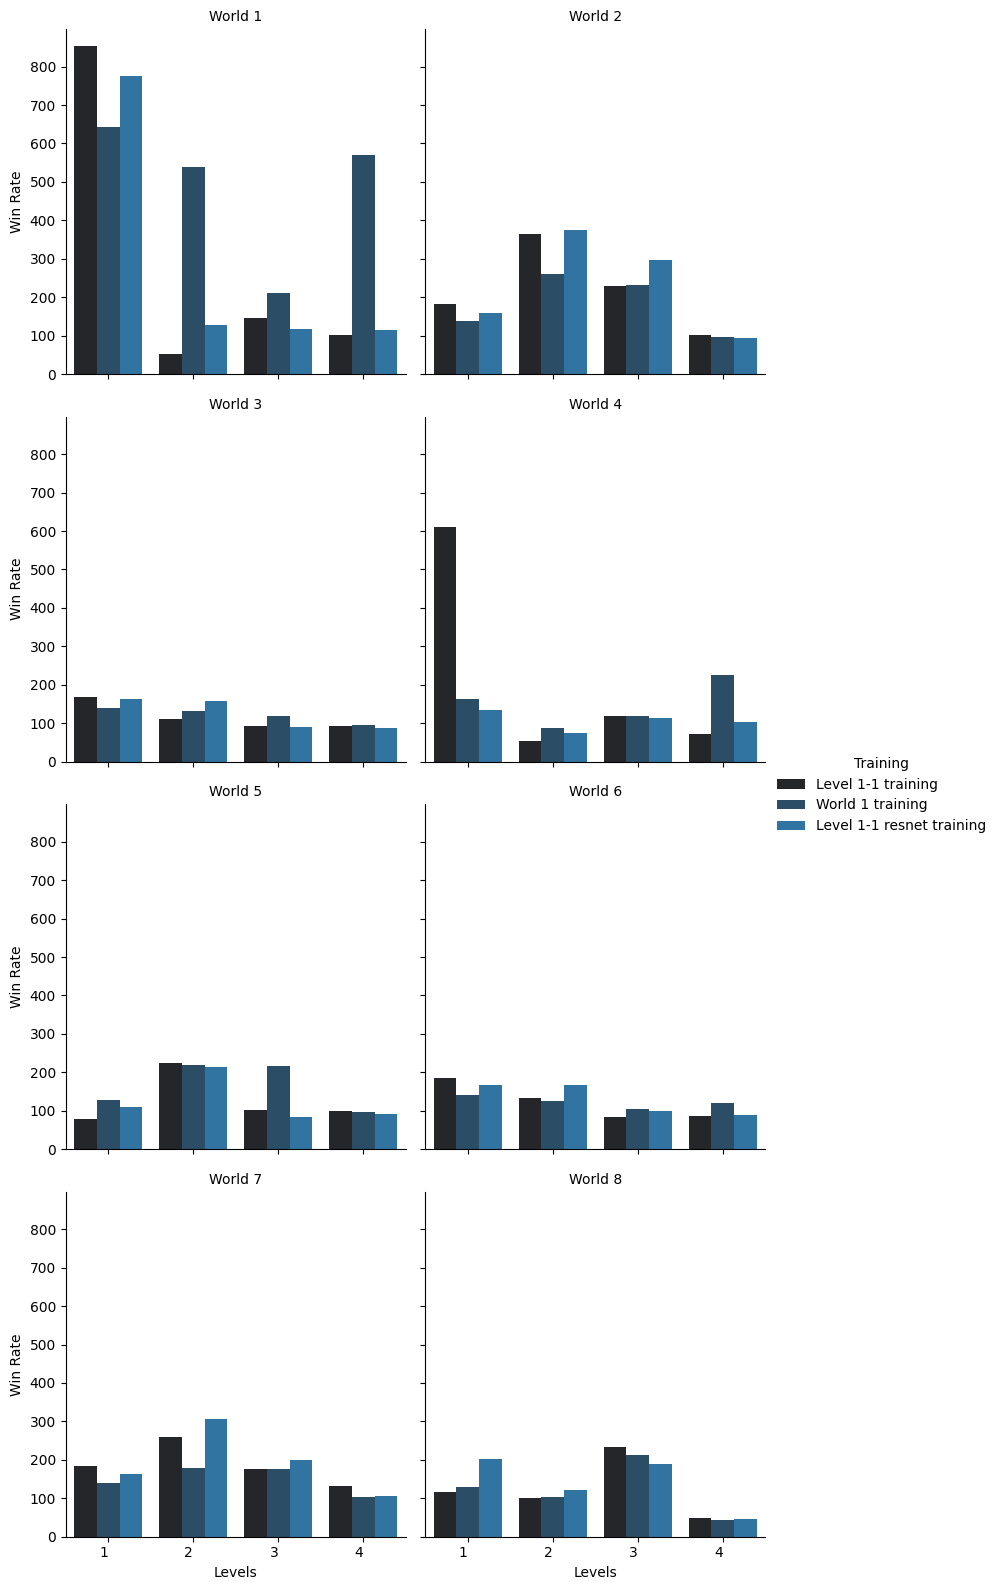

In [ ]:
df_win_rates = df.drop(["level_1-1_mean_reward", "world1_v1_mean_reward", "world1_v2_mean_reward"], axis=1)
df_mean_reward = df.drop(["level_1-1_win_rates", "world1_v1_win_rates", "world1_v2_win_rates", "world1_v1_mean_reward", "level_1-1_resnet_win_rates", "world1_resnet_win_rates"], axis=1)

df_mean_reward = df_mean_reward.rename(columns={"level_1-1_mean_reward": "Level 1-1 training", "world1_v2_mean_reward": "World 1 training", "level_1-1_resnet_mean_reward": "Level 1-1 resnet training", "world1_resnet_mean_reward": "World 1 resnet training"})

df_current = df_mean_reward

df_current["World"] = df_current["Levels"].apply(lambda x: x.split("-")[0])
df_current["Levels"] = df_current["Levels"].apply(lambda x: x.split("-")[1])

# Melt the DataFrame for Seaborn
df_melted = df_current.melt(id_vars=["Levels", "World"], var_name="Training", value_name="Win Rate")

# Convert World to categorical type for proper ordering
df_melted["World"] = pd.Categorical(df_melted["World"], categories=[str(i) for i in range(1, 9)], ordered=True)

# Create a FacetGrid to plot each world separately (one plot per world)
g = sns.FacetGrid(df_melted, col="World", col_wrap=2, height=4, sharey=True)

# Use seaborn barplot inside FacetGrid
g.map_dataframe(sns.barplot, x="Levels", y="Win Rate", hue="Training", dodge=True)

# Adjust labels
g.set_axis_labels("Levels", "Win Rate")
g.set_titles("World {col_name}")
g.add_legend(title="Training")

# Rotate x-axis labels for better readability
for i, ax in enumerate(g.axes.flat):
    ax.set_xticklabels([f"{j+1}" for j in range(4)], rotation=0, ha="right")

plt.show()

In [45]:
#df["level_1-3"] = [0 for _ in range(32)]

In [ ]:
#df.to_csv("best_model_ppo/win_rates.csv")